In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yabox
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Run Model before the Optimizer

There's no need to run data engineering

# Data Engineering

In [2]:
sales = pd.read_csv('TSC_Sales_Data.csv')
change = pd.read_csv('TSC_Price_Changes.csv')
comp = pd.read_csv('Competitors_Price_Changes.csv')

In [3]:
sales

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
0,1,20180402,1296,2,2.0,322.99,132.97
1,1,20181206,6878,1,1.0,322.99,132.97
2,1,20181210,7010,2,2.0,322.99,132.97
3,1,20190214,8380,2,1.0,322.99,132.97
4,1,20190502,10639,1,2.0,219.99,132.97
...,...,...,...,...,...,...,...
70824,97,20210728,70220,1,5.0,19.99,11.70
70825,97,20210728,70246,1,1.0,19.99,11.70
70826,97,20210729,70276,1,1.0,19.99,11.70
70827,97,20210729,70277,1,4.0,19.99,11.70


In [4]:
for i,x in sales.iterrows():
    s = str(x.TIME_DIM_KEY)
    s = s[:4] + '-' + s[4:6] + '-' + s[6:8]
    sales.loc[i,'TIME_DIM_KEY'] = s
sales

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
0,1,2018-04-02,1296,2,2.0,322.99,132.97
1,1,2018-12-06,6878,1,1.0,322.99,132.97
2,1,2018-12-10,7010,2,2.0,322.99,132.97
3,1,2019-02-14,8380,2,1.0,322.99,132.97
4,1,2019-05-02,10639,1,2.0,219.99,132.97
...,...,...,...,...,...,...,...
70824,97,2021-07-28,70220,1,5.0,19.99,11.70
70825,97,2021-07-28,70246,1,1.0,19.99,11.70
70826,97,2021-07-29,70276,1,1.0,19.99,11.70
70827,97,2021-07-29,70277,1,4.0,19.99,11.70


In [5]:
sales.TIME_DIM_KEY = pd.to_datetime(sales.TIME_DIM_KEY).dt.date
sales

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
0,1,2018-04-02,1296,2,2.0,322.99,132.97
1,1,2018-12-06,6878,1,1.0,322.99,132.97
2,1,2018-12-10,7010,2,2.0,322.99,132.97
3,1,2019-02-14,8380,2,1.0,322.99,132.97
4,1,2019-05-02,10639,1,2.0,219.99,132.97
...,...,...,...,...,...,...,...
70824,97,2021-07-28,70220,1,5.0,19.99,11.70
70825,97,2021-07-28,70246,1,1.0,19.99,11.70
70826,97,2021-07-29,70276,1,1.0,19.99,11.70
70827,97,2021-07-29,70277,1,4.0,19.99,11.70


In [6]:
change

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26,2019-10-03,199.99
1,1,2019-10-04,2019-10-08,179.99
2,1,2019-10-09,2019-10-27,199.99
3,1,2019-10-28,2019-10-29,179.99
4,1,2019-10-30,2019-11-05,199.99
...,...,...,...,...
3881,97,2020-12-06,2020-12-07,19.99
3882,97,2020-12-08,2020-12-12,15.99
3883,97,2020-12-13,2020-12-18,15.99
3884,97,2020-12-19,2020-12-24,15.99


In [7]:
change.PRICE_END_DATE.replace({'9999-12-31':'2021-12-31'}, inplace=True)
change

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26,2019-10-03,199.99
1,1,2019-10-04,2019-10-08,179.99
2,1,2019-10-09,2019-10-27,199.99
3,1,2019-10-28,2019-10-29,179.99
4,1,2019-10-30,2019-11-05,199.99
...,...,...,...,...
3881,97,2020-12-06,2020-12-07,19.99
3882,97,2020-12-08,2020-12-12,15.99
3883,97,2020-12-13,2020-12-18,15.99
3884,97,2020-12-19,2020-12-24,15.99


In [8]:
change.PRICE_START_DATE = pd.to_datetime(change.PRICE_START_DATE)
change.PRICE_END_DATE = pd.to_datetime(change.PRICE_END_DATE)
change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SCRUB_ITEM        3886 non-null   int64         
 1   PRICE_START_DATE  3886 non-null   datetime64[ns]
 2   PRICE_END_DATE    3886 non-null   datetime64[ns]
 3   TSC_PRICE         3886 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 121.6 KB


In [9]:
comp.SCRUB_COMPETITOR.unique()

array([1, 2, 3])

In [10]:
comp.SCAN_DATE_TIME = pd.to_datetime(comp.SCAN_DATE_TIME).dt.date
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90953 entries, 0 to 90952
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCAN_DATE_TIME               90953 non-null  object 
 1   SCRUB_ITEM                   90953 non-null  int64  
 2   SCRUB_COMPETITOR             90953 non-null  int64  
 3   TSC_PRICE                    90953 non-null  float64
 4   COMPETITOR_PRICE             90953 non-null  float64
 5   CPI_COMPETITIVE_PRICE_INDEX  90953 non-null  float64
 6   COMPETITOR_SHIPPING          51396 non-null  float64
 7   COMPETITOR_REG_PRICE         90953 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 5.6+ MB


In [11]:
compx = comp
comp

,SCAN_DATE_TIME,SCRUB_ITEM,SCRUB_COMPETITOR,TSC_PRICE,COMPETITOR_PRICE,CPI_COMPETITIVE_PRICE_INDEX,COMPETITOR_SHIPPING,COMPETITOR_REG_PRICE
0,2020-08-06,1,1,199.99,205.58,102.7951,0.0,205.58
1,2020-08-06,1,2,199.99,205.58,102.7951,0.0,205.58
2,2020-08-07,1,1,199.99,205.58,102.7951,0.0,205.58
3,2020-08-07,1,2,199.99,205.58,102.7951,0.0,205.58
4,2020-08-08,1,1,199.99,205.58,102.7951,0.0,205.58
...,...,...,...,...,...,...,...,...
90948,2021-08-02,97,2,19.99,27.16,135.8679,0.0,27.16
90949,2021-08-03,97,2,19.99,27.16,135.8679,0.0,27.16
90950,2021-08-04,97,2,19.99,27.16,135.8679,0.0,27.16
90951,2021-08-05,97,2,19.99,36.92,184.6923,0.0,36.92


In [12]:
comp['TOTAL_PRICE'] = comp['COMPETITOR_PRICE'] + comp['COMPETITOR_SHIPPING']
comp = comp.drop(columns = ['COMPETITOR_PRICE', 'COMPETITOR_SHIPPING', 'COMPETITOR_REG_PRICE'])
comp

,SCAN_DATE_TIME,SCRUB_ITEM,SCRUB_COMPETITOR,TSC_PRICE,CPI_COMPETITIVE_PRICE_INDEX,TOTAL_PRICE
0,2020-08-06,1,1,199.99,102.7951,205.58
1,2020-08-06,1,2,199.99,102.7951,205.58
2,2020-08-07,1,1,199.99,102.7951,205.58
3,2020-08-07,1,2,199.99,102.7951,205.58
4,2020-08-08,1,1,199.99,102.7951,205.58
...,...,...,...,...,...,...
90948,2021-08-02,97,2,19.99,135.8679,27.16
90949,2021-08-03,97,2,19.99,135.8679,27.16
90950,2021-08-04,97,2,19.99,135.8679,27.16
90951,2021-08-05,97,2,19.99,184.6923,36.92


In [13]:
df = pd.DataFrame({'SCRUB_ITEM':comp.SCRUB_ITEM,'SCAN_DATE_TIME':comp.SCAN_DATE_TIME})
df

,SCRUB_ITEM,SCAN_DATE_TIME
0,1,2020-08-06
1,1,2020-08-06
2,1,2020-08-07
3,1,2020-08-07
4,1,2020-08-08
...,...,...
90948,97,2021-08-02
90949,97,2021-08-03
90950,97,2021-08-04
90951,97,2021-08-05


In [14]:
df = df.drop_duplicates(keep = "first")
df.reset_index(drop=True)

,SCRUB_ITEM,SCAN_DATE_TIME
0,1,2020-08-06
1,1,2020-08-07
2,1,2020-08-08
3,1,2020-08-09
4,1,2020-08-10
...,...,...
30287,97,2021-08-02
30288,97,2021-08-03
30289,97,2021-08-04
30290,97,2021-08-05


In [15]:
comp1_price = []
comp2_price = []
comp3_price = []
for i,x in df.iterrows():
    s1 = comp[(comp.SCRUB_ITEM == x.SCRUB_ITEM) & (comp.SCAN_DATE_TIME == x.SCAN_DATE_TIME) & (comp.SCRUB_COMPETITOR == 1)] 
    s2 = comp[(comp.SCRUB_ITEM == x.SCRUB_ITEM) & (comp.SCAN_DATE_TIME == x.SCAN_DATE_TIME) & (comp.SCRUB_COMPETITOR == 2)]
    s3 = comp[(comp.SCRUB_ITEM == x.SCRUB_ITEM) & (comp.SCAN_DATE_TIME == x.SCAN_DATE_TIME) & (comp.SCRUB_COMPETITOR == 3)]
    if s1.empty:
        comp1_price.append(float('NaN'))
    else:
        comp1_price.append(s1.TOTAL_PRICE.values[0])
    if s2.empty:
        comp2_price.append(float('NaN'))
    else:
        comp2_price.append(s2.TOTAL_PRICE.values[0])
    if s3.empty:
        comp3_price.append(float('NaN'))
    else:
        comp3_price.append(s3.TOTAL_PRICE.values[0])

In [16]:
df['comp1_price'] = comp1_price
df['comp2_price'] = comp2_price
df['comp3_price'] = comp3_price
df = df.fillna(9999999999)
df

<ipython-input-16-7a2bc5288e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comp1_price'] = comp1_price
<ipython-input-16-7a2bc5288e2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comp2_price'] = comp2_price
<ipython-input-16-7a2bc5288e2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,SCRUB_ITEM,SCAN_DATE_TIME,comp1_price,comp2_price,comp3_price
0,1,2020-08-06,2.055800e+02,205.58,1.000000e+10
2,1,2020-08-07,2.055800e+02,205.58,1.000000e+10
4,1,2020-08-08,2.055800e+02,205.58,1.000000e+10
6,1,2020-08-09,2.051700e+02,205.17,1.000000e+10
8,1,2020-08-10,2.051700e+02,205.17,1.000000e+10
...,...,...,...,...,...
90948,97,2021-08-02,1.000000e+10,27.16,1.000000e+10
90949,97,2021-08-03,1.000000e+10,27.16,1.000000e+10
90950,97,2021-08-04,1.000000e+10,27.16,1.000000e+10
90951,97,2021-08-05,1.000000e+10,36.92,1.000000e+10


In [17]:
qty = []
price = []
cost = []
for i,x in df.iterrows():
    s = sales[(sales.TIME_DIM_KEY == x.SCAN_DATE_TIME) & (sales.SCRUB_ITEM == x.SCRUB_ITEM)]
    if s.empty:
        unit_qty = float("NaN")
        unit_price = float("NaN")
        unit_cost = float("NaN")
    else:
        unit_qty = s.UNIT_QTY.sum()
        unit_price = s.UNIT_PRICE.values[0]
        unit_cost = s.UNIT_COST.values[0]
    qty.append(unit_qty)
    price.append(unit_price)
    cost.append(unit_cost)

In [18]:
df['unit_qty'] = qty
df = df.fillna(0)
df

,SCRUB_ITEM,SCAN_DATE_TIME,comp1_price,comp2_price,comp3_price,unit_qty
0,1,2020-08-06,2.055800e+02,205.58,1.000000e+10,2.0
2,1,2020-08-07,2.055800e+02,205.58,1.000000e+10,0.0
4,1,2020-08-08,2.055800e+02,205.58,1.000000e+10,0.0
6,1,2020-08-09,2.051700e+02,205.17,1.000000e+10,0.0
8,1,2020-08-10,2.051700e+02,205.17,1.000000e+10,2.0
...,...,...,...,...,...,...
90948,97,2021-08-02,1.000000e+10,27.16,1.000000e+10,0.0
90949,97,2021-08-03,1.000000e+10,27.16,1.000000e+10,0.0
90950,97,2021-08-04,1.000000e+10,27.16,1.000000e+10,0.0
90951,97,2021-08-05,1.000000e+10,36.92,1.000000e+10,-3.0


In [19]:
price = []
for i,x in df.iterrows():
    s = comp[(comp.SCRUB_ITEM == x.SCRUB_ITEM) & (comp.SCAN_DATE_TIME == x.SCAN_DATE_TIME)]
    price.append(s.TSC_PRICE.values[0])


In [20]:
df['unit_price'] = price
df

,SCRUB_ITEM,SCAN_DATE_TIME,comp1_price,comp2_price,comp3_price,unit_qty,unit_price
0,1,2020-08-06,2.055800e+02,205.58,1.000000e+10,2.0,199.99
2,1,2020-08-07,2.055800e+02,205.58,1.000000e+10,0.0,199.99
4,1,2020-08-08,2.055800e+02,205.58,1.000000e+10,0.0,199.99
6,1,2020-08-09,2.051700e+02,205.17,1.000000e+10,0.0,199.99
8,1,2020-08-10,2.051700e+02,205.17,1.000000e+10,2.0,199.99
...,...,...,...,...,...,...,...
90948,97,2021-08-02,1.000000e+10,27.16,1.000000e+10,0.0,19.99
90949,97,2021-08-03,1.000000e+10,27.16,1.000000e+10,0.0,19.99
90950,97,2021-08-04,1.000000e+10,27.16,1.000000e+10,0.0,19.99
90951,97,2021-08-05,1.000000e+10,36.92,1.000000e+10,-3.0,19.99


In [21]:
df['unit_cost'] = cost
df.unit_cost = df.unit_cost.fillna(method = 'ffill')
df

,SCRUB_ITEM,SCAN_DATE_TIME,comp1_price,comp2_price,comp3_price,unit_qty,unit_price,unit_cost
0,1,2020-08-06,2.055800e+02,205.58,1.000000e+10,2.0,199.99,132.97
2,1,2020-08-07,2.055800e+02,205.58,1.000000e+10,0.0,199.99,132.97
4,1,2020-08-08,2.055800e+02,205.58,1.000000e+10,0.0,199.99,132.97
6,1,2020-08-09,2.051700e+02,205.17,1.000000e+10,0.0,199.99,132.97
8,1,2020-08-10,2.051700e+02,205.17,1.000000e+10,2.0,199.99,132.97
...,...,...,...,...,...,...,...,...
90948,97,2021-08-02,1.000000e+10,27.16,1.000000e+10,0.0,19.99,11.70
90949,97,2021-08-03,1.000000e+10,27.16,1.000000e+10,0.0,19.99,11.70
90950,97,2021-08-04,1.000000e+10,27.16,1.000000e+10,0.0,19.99,11.70
90951,97,2021-08-05,1.000000e+10,36.92,1.000000e+10,-3.0,19.99,11.70


In [22]:
df = df.reset_index(drop = True)
df

,SCRUB_ITEM,SCAN_DATE_TIME,comp1_price,comp2_price,comp3_price,unit_qty,unit_price,unit_cost
0,1,2020-08-06,2.055800e+02,205.58,1.000000e+10,2.0,199.99,132.97
1,1,2020-08-07,2.055800e+02,205.58,1.000000e+10,0.0,199.99,132.97
2,1,2020-08-08,2.055800e+02,205.58,1.000000e+10,0.0,199.99,132.97
3,1,2020-08-09,2.051700e+02,205.17,1.000000e+10,0.0,199.99,132.97
4,1,2020-08-10,2.051700e+02,205.17,1.000000e+10,2.0,199.99,132.97
...,...,...,...,...,...,...,...,...
30287,97,2021-08-02,1.000000e+10,27.16,1.000000e+10,0.0,19.99,11.70
30288,97,2021-08-03,1.000000e+10,27.16,1.000000e+10,0.0,19.99,11.70
30289,97,2021-08-04,1.000000e+10,27.16,1.000000e+10,0.0,19.99,11.70
30290,97,2021-08-05,1.000000e+10,36.92,1.000000e+10,-3.0,19.99,11.70


In [41]:
df1 = df.groupby(by=['unit_cost','unit_price','SCRUB_ITEM', 'comp1_price', 'comp2_price', 'comp3_price'], as_index=False).sum()
df1

,unit_cost,unit_price,SCRUB_ITEM,comp1_price,comp2_price,comp3_price,unit_qty
0,10.99,14.99,2,1.958000e+01,1.000000e+10,1.958000e+01,297.0
1,10.99,14.99,2,1.958000e+01,1.000000e+10,2.557000e+01,1616.0
2,10.99,14.99,2,1.958000e+01,1.000000e+10,1.000000e+10,237.0
3,10.99,14.99,2,2.017000e+01,1.000000e+10,2.557000e+01,603.0
4,10.99,14.99,2,2.017000e+01,1.000000e+10,1.000000e+10,343.0
...,...,...,...,...,...,...,...
3725,2012.49,999.99,15,1.000000e+10,9.121600e+02,1.000000e+10,0.0
3726,2012.49,2899.99,14,1.000000e+10,1.000000e+10,1.000000e+10,1.0
3727,3103.78,239.99,85,1.000000e+10,2.499900e+02,1.000000e+10,0.0
3728,3103.78,3999.99,84,1.000000e+10,3.899990e+03,1.000000e+10,2.0


In [42]:
df1.to_csv('TSC_PRICE_OPT.csv', index=False)

# Model

In [3]:
df1 = pd.read_csv('TSC_PRICE_OPT.csv')

In [4]:
df1

,unit_cost,unit_price,SCRUB_ITEM,comp1_price,comp2_price,comp3_price,unit_qty
0,10.99,14.99,2,1.958000e+01,1.000000e+10,1.958000e+01,297.0
1,10.99,14.99,2,1.958000e+01,1.000000e+10,2.557000e+01,1616.0
2,10.99,14.99,2,1.958000e+01,1.000000e+10,1.000000e+10,237.0
3,10.99,14.99,2,2.017000e+01,1.000000e+10,2.557000e+01,603.0
4,10.99,14.99,2,2.017000e+01,1.000000e+10,1.000000e+10,343.0
...,...,...,...,...,...,...,...
3725,2012.49,999.99,15,1.000000e+10,9.121600e+02,1.000000e+10,0.0
3726,2012.49,2899.99,14,1.000000e+10,1.000000e+10,1.000000e+10,1.0
3727,3103.78,239.99,85,1.000000e+10,2.499900e+02,1.000000e+10,0.0
3728,3103.78,3999.99,84,1.000000e+10,3.899990e+03,1.000000e+10,2.0


In [5]:
items = df1.SCRUB_ITEM.unique()
df2 = pd.DataFrame(columns = ['unit_cost','unit_price','comp1_price','comp2_price','comp3_price','unit_qty'])
for i in items:
    x = df1[df1.SCRUB_ITEM == i]
    x = x.drop('SCRUB_ITEM', axis=1)
    scaler = MinMaxScaler()
    df2 = pd.concat([df2,pd.DataFrame(scaler.fit_transform(x.to_numpy()),columns = ['unit_cost','unit_price','comp1_price','comp2_price','comp3_price','unit_qty'])])
df2=df2.reset_index(drop=True)
df2

,unit_cost,unit_price,comp1_price,comp2_price,comp3_price,unit_qty
0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.182269
1,0.0,0.0,0.000000e+00,0.000000e+00,5.990000e-10,1.000000
2,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00,0.145071
3,0.0,0.0,5.900000e-11,0.000000e+00,5.990000e-10,0.371978
4,0.0,0.0,5.900000e-11,0.000000e+00,1.000000e+00,0.210787
...,...,...,...,...,...,...
3725,0.0,0.0,1.000000e+00,1.113450e-07,1.000000e+00,0.058824
3726,0.0,0.0,1.000000e+00,1.234310e-07,1.000000e+00,0.000000
3727,0.0,0.0,1.000000e+00,1.000000e+00,7.009001e-09,0.058824
3728,0.0,0.0,1.000000e+00,1.000000e+00,7.053001e-09,0.235294


In [6]:
X_train, X_val, y_train, y_val = train_test_split(df2.drop('unit_qty', axis=1).values, df2.unit_qty)

In [7]:
xgb = XGBRegressor(subsample=0.7,
                    reg_lambda=100,
                    # n_estimators=300,
                    n_estimators=1000,
                    min_child_weight=3,
                    max_depth=20,
                    learning_rate=0.2,
                    gamma=1,
                    colsample_bytree=0.7,
                    colsample_bylevel=0.9,
                    random_state=0)

xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_val, y_val)], early_stopping_rounds=5)

[0]	validation_0-rmse:0.38060
[1]	validation_0-rmse:0.33372
[2]	validation_0-rmse:0.29995
[3]	validation_0-rmse:0.27524
[4]	validation_0-rmse:0.25812
[5]	validation_0-rmse:0.24632
[6]	validation_0-rmse:0.23784
[7]	validation_0-rmse:0.23291
[8]	validation_0-rmse:0.22950
[9]	validation_0-rmse:0.22736
[10]	validation_0-rmse:0.22598
[11]	validation_0-rmse:0.22504
[12]	validation_0-rmse:0.22444
[13]	validation_0-rmse:0.22411
[14]	validation_0-rmse:0.22395
[15]	validation_0-rmse:0.22387
[16]	validation_0-rmse:0.22380
[17]	validation_0-rmse:0.22379
[18]	validation_0-rmse:0.22377
[19]	validation_0-rmse:0.22377
[20]	validation_0-rmse:0.22378
[21]	validation_0-rmse:0.22379
[22]	validation_0-rmse:0.22380


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=20,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=100, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
X_train[1]

array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 8.24000005e-10,
       1.49000001e-10])

In [9]:
def return_inverse_profit(cost, comp1, comp2, comp3, item):
    def f(x):
        inp = np.array([cost, float(x), comp1, comp2, comp3]).reshape(1,-1)
        a = xgb.predict(inp)
        dfx = df1[df1.SCRUB_ITEM == item]
        scaler = MinMaxScaler()
        scaler.fit(dfx['unit_qty'].values.reshape(-1,1))
        a = scaler.inverse_transform(np.array(a).reshape(1,-1))
        scaler.fit(dfx['unit_cost'].values.reshape(-1,1))
        unit_cost = scaler.inverse_transform(np.array(cost).reshape(1,-1))
        scaler.fit(dfx['unit_price'].values.reshape(-1,1))
        x = scaler.inverse_transform(np.array(x).reshape(1,-1))
        profit = (a * (x - unit_cost))
        inverse_profit = 10000000-profit
        return inverse_profit
    return f

In [47]:
def dynamic_pricing(item, comp1, comp2, comp3, cost):
    scaler = MinMaxScaler()
    scaler = scaler.fit(df1[df1.SCRUB_ITEM == item].comp1_price.values.reshape(-1,1))
    comp1 = float(scaler.transform(np.array(comp1).reshape(1,-1))[0])
    scaler = scaler.fit(df1[df1.SCRUB_ITEM == item].comp2_price.values.reshape(-1,1))
    comp2 = float(scaler.transform(np.array(comp2).reshape(1,-1))[0])
    scaler = scaler.fit(df1[df1.SCRUB_ITEM == item].comp3_price.values.reshape(-1,1))
    comp3 = float(scaler.transform(np.array(comp3).reshape(1,-1))[0])
    scaler = scaler.fit(df1[df1.SCRUB_ITEM == item].unit_cost.values.reshape(-1,1))
    cost = float(scaler.transform(np.array(cost).reshape(1,-1))[0])
    f = return_inverse_profit(cost, comp1, comp2, comp3, item)
    out = yabox.DE(f, [(0.00,1.00)], maxiters=1000)
    x0, y0 = out.solve(show_progress=True)
    dfx = df1[df1.SCRUB_ITEM == item]
    scaler = MinMaxScaler()
    scaler.fit(dfx['unit_price'].values.reshape(-1,1))
    print('Price :',x0[0][0])
    fig.show()
    

# Optimizer

Order of parameters : Item number, Competitor 1 price, Competitor 2 price, Competitor 3 price, Cost of production

Competitors price should be 9999999999 if the competitor does not have to item listed.

In [ ]:
dynamic_pricing(1, 205.58, 205.58, 205.58, 132.97)

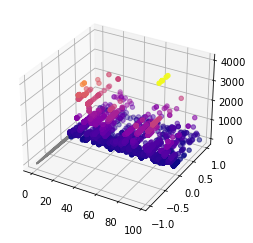

In [39]:
ax = plt.axes(projection='3d')
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
zdata = df1.unit_price
xdata = df1.SCRUB_ITEM
ydata = df2.unit_qty
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='plasma')